In [42]:
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (RandomForestRegressor, 
                             GradientBoostingRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import scipy

## Cargando datos y pipeline

In [2]:
fe_pipeline = joblib.load("../models/fe_pipeline.joblib")
fe_pipeline

,steps,"[('missing_indicator', ...), ('numerical_imputation', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_only,True
,variables,"['antiguedad', 'kilometraje', ...]"
,imputation_method,'median'
,variables,"['antiguedad', 'kilometraje']"
,imputation_method,'missing'
,fill_value,'missing'
,variables,"['vehicle_brand', 'vehicle_line', ...]"


In [3]:
X_train_transformed = pd.read_excel("../data/gold/X_train_transformed.xlsx")
X_test_transformed = pd.read_excel("../data/gold/X_test_transformed.xlsx")



In [4]:
y_train = X_train_transformed['price']
y_test = X_test_transformed['price']
X_train_transformed = X_train_transformed.drop(columns=['price'])
X_test_transformed = X_test_transformed.drop(columns=['price'])

## Regresion lineal

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train_transformed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred_train = lr.predict(X_train_transformed)

## Metricas en train

In [8]:
r2= r2_score(y_train, y_pred_train)
mse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
medae = median_absolute_error(y_train, y_pred_train)

metrics_train = {
    "r2": r2,
    "mse": mse,
    "mae": mae,
    "medae": medae
}
metrics_train



{'r2': 0.4771798456247871,
 'mse': np.float64(48057450.212571554),
 'mae': 27957521.440387,
 'medae': 19364640.64176935}

## Metricas en test

In [9]:
y_pred_test = lr.predict(X_test_transformed)

In [10]:
r2_test = r2_score(y_test, y_pred_test)
mse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)

metrics_test = {
    "r2": r2_test,
    "mse": mse_test,
    "mae": mae_test,
    "medae": medae_test
}
metrics_test

{'r2': 0.4688398738771987,
 'mse': np.float64(48086189.799851425),
 'mae': 28940058.797568023,
 'medae': 20064302.52578436}

In [11]:
metrics = {
    "train": metrics_train,
    "test": metrics_test
}
metrics


{'train': {'r2': 0.4771798456247871,
  'mse': np.float64(48057450.212571554),
  'mae': 27957521.440387,
  'medae': 19364640.64176935},
 'test': {'r2': 0.4688398738771987,
  'mse': np.float64(48086189.799851425),
  'mae': 28940058.797568023,
  'medae': 20064302.52578436}}

In [12]:
pd.DataFrame(metrics)

,train,test
r2,4.771798e-01,4.688399e-01
mse,4.805745e+07,4.808619e+07
mae,2.795752e+07,2.894006e+07
medae,1.936464e+07,2.006430e+07


In [13]:
lr.coef_

array([-2.01509621e+08, -9.12953052e+07,  5.29775801e+07,  9.73539505e+07,
        1.51236356e+07, -2.48712051e+05, -9.54752809e+05, -5.90822581e+06,
       -7.91292390e+06,  2.56992402e+06])

In [14]:
lr.intercept_

np.float64(38422005.44531365)

- Inferencia: Encontrar relaciones causales (Investigacion): Cientificos - Supuestos 
- Prediccion: Predecir el precio de la mejor manera posible (Cientifico de datos) Tecnologia

In [15]:
X_test_transformed

,antiguedad,kilometraje,vehicle_brand,vehicle_line,location_state,antiguedad_na,kilometraje_na,vehicle_brand_na,vehicle_line_na,location_state_na
0,0.120690,0.032383,0.193548,0.877698,0.25,1,0,0,0,0
1,0.258621,0.067531,0.419355,0.237410,0.25,0,0,0,0,0
2,0.224138,0.154932,0.580645,0.676259,0.25,0,0,0,0,0
3,0.051724,0.029122,0.935484,0.812950,0.00,0,0,0,0,1
4,0.137931,0.080977,0.225806,0.266187,0.25,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2170,0.068966,0.037178,0.129032,0.050360,0.75,0,0,0,0,0
2171,0.051724,0.079825,0.129032,0.633094,0.50,0,0,0,0,0
2172,0.120690,0.103676,0.838710,0.827338,0.00,1,0,0,0,1
2173,0.258621,0.160757,0.516129,0.978417,0.25,0,0,0,0,0


## Random Forest

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train_transformed, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_pred_train_rf = rf.predict(X_train_transformed)
r2_rf = r2_score(y_train, y_pred_train_rf)
mse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
medae_rf = median_absolute_error(y_train, y_pred_train_rf)

metrics_rf_train = {
    "r2": r2_rf,
    "mse": mse_rf,
    "mae": mae_rf,
    "medae": medae_rf
}
metrics_rf_train


{'r2': 0.9528725778794485,
 'mse': np.float64(14428507.395537073),
 'mae': 6302100.762491612,
 'medae': 2950000.0}

In [18]:
y_pred_test_rf = rf.predict(X_test_transformed)
r2_rf = r2_score(y_test, y_pred_test_rf)
mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
medae_rf = median_absolute_error(y_test, y_pred_test_rf)

metrics_rf_test = {
    "r2": r2_rf,
    "mse": mse_rf,
    "mae": mae_rf,
    "medae": medae_rf
}
metrics_rf_test

{'r2': 0.6844198479902682,
 'mse': np.float64(37064869.39392546),
 'mae': 17547535.781109907,
 'medae': 8348000.0}

In [19]:
metrics_rf = {
    "train": metrics_rf_train,
    "test": metrics_rf_test
}
metrics_rf

{'train': {'r2': 0.9528725778794485,
  'mse': np.float64(14428507.395537073),
  'mae': 6302100.762491612,
  'medae': 2950000.0},
 'test': {'r2': 0.6844198479902682,
  'mse': np.float64(37064869.39392546),
  'mae': 17547535.781109907,
  'medae': 8348000.0}}

In [20]:
metrics

{'train': {'r2': 0.4771798456247871,
  'mse': np.float64(48057450.212571554),
  'mae': 27957521.440387,
  'medae': 19364640.64176935},
 'test': {'r2': 0.4688398738771987,
  'mse': np.float64(48086189.799851425),
  'mae': 28940058.797568023,
  'medae': 20064302.52578436}}

In [21]:
y_exploracion = {
    "test": y_test,
    "y_pred_lr": y_pred_test,
    "y_pred_rf": y_pred_test_rf
}
y_exploracion
y_exploracion_df = pd.DataFrame(y_exploracion)
y_exploracion_df



,test,y_pred_lr,y_pred_rf
0,188500000,1.103787e+08,156997500.0
1,38000000,2.925229e+07,31418000.0
2,70000000,7.949003e+07,65228000.0
3,169000000,1.566139e+08,142352200.0
4,50000000,4.489274e+07,52202000.0
...,...,...,...
2170,41000000,4.421185e+07,40311000.0
2171,39000000,9.674328e+07,100349800.0
2172,59900000,1.319354e+08,88989000.0
2173,75000000,9.800806e+07,86702000.0


## GradientBossting

In [22]:
gb = GradientBoostingRegressor()
gb.fit(X_train_transformed, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [23]:
y_pred_train_gb = gb.predict(X_train_transformed)
r2_gb = r2_score(y_train, y_pred_train_gb)
mse_gb = np.sqrt(mean_squared_error(y_train, y_pred_train_gb))
mae_gb = mean_absolute_error(y_train, y_pred_train_gb)
medae_gb = median_absolute_error(y_train, y_pred_train_gb)

metrics_gb_train = {
    "r2": r2_gb,
    "mse": mse_gb,
    "mae": mae_gb,
    "medae": medae_gb
}
metrics_gb_train

{'r2': 0.7190882187616463,
 'mse': np.float64(35226503.71966199),
 'mae': 16844316.3575578,
 'medae': 9580578.265350863}

In [24]:
y_pred_test_gb = gb.predict(X_test_transformed)
r2_gb = r2_score(y_test, y_pred_test_gb)
mse_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
mae_gb = mean_absolute_error(y_test, y_pred_test_gb)
medae_gb = median_absolute_error(y_test, y_pred_test_gb)

metrics_gb_test = {
    "r2": r2_gb,
    "mse": mse_gb,
    "mae": mae_gb,
    "medae": medae_gb
}
metrics_gb_test


{'r2': 0.6878954843015681,
 'mse': np.float64(36860197.66136472),
 'mae': 18996309.46613801,
 'medae': 10687422.657763869}

In [25]:

metrics_gb = {
    "train": metrics_gb_train,
    "test": metrics_gb_test
}
metrics_gb


{'train': {'r2': 0.7190882187616463,
  'mse': np.float64(35226503.71966199),
  'mae': 16844316.3575578,
  'medae': 9580578.265350863},
 'test': {'r2': 0.6878954843015681,
  'mse': np.float64(36860197.66136472),
  'mae': 18996309.46613801,
  'medae': 10687422.657763869}}

In [26]:
metrics_rf

{'train': {'r2': 0.9528725778794485,
  'mse': np.float64(14428507.395537073),
  'mae': 6302100.762491612,
  'medae': 2950000.0},
 'test': {'r2': 0.6844198479902682,
  'mse': np.float64(37064869.39392546),
  'mae': 17547535.781109907,
  'medae': 8348000.0}}

In [27]:
y_exploracion_df['y_pred_gb'] = y_pred_test_gb

## Maquina de soporte vectorial

In [28]:
svr = SVR()
svr.fit(X_train_transformed, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [29]:
y_pred_train_svr = svr.predict(X_train_transformed)
r2_svr = r2_score(y_train, y_pred_train_svr)
mse_svr = np.sqrt(mean_squared_error(y_train, y_pred_train_svr))
mae_svr = mean_absolute_error(y_train, y_pred_train_svr)
medae_svr = median_absolute_error(y_train, y_pred_train_svr)

metrics_svr_train = {
    "r2": r2_svr,
    "mse": mse_svr,
    "mae": mae_svr,
    "medae": medae_svr
}
metrics_svr_train

{'r2': -0.0839847964136815,
 'mse': np.float64(69198417.0217578),
 'mae': 41641403.64589739,
 'medae': 26999672.054200277}

In [30]:
y_pred_test_svr = svr.predict(X_test_transformed)
r2_svr = r2_score(y_test, y_pred_test_svr)
mse_svr = np.sqrt(mean_squared_error(y_test, y_pred_test_svr))
mae_svr = mean_absolute_error(y_test, y_pred_test_svr)
medae_svr = median_absolute_error(y_test, y_pred_test_svr)

metrics_svr_train = {
    "r2": r2_svr,
    "mse": mse_svr,
    "mae": mae_svr,
    "medae": medae_svr
}
metrics_svr_train

{'r2': -0.09039781152449278,
 'mse': np.float64(68896969.45910542),
 'mae': 42248906.097177275,
 'medae': 26999255.90427769}

In [31]:
y_exploracion_df['y_pred_svr'] = y_pred_test_svr

# Usando XGboost

In [43]:
xgb = XGBRegressor()
xgb.fit(X_train_transformed, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [44]:
y_pred_train_xgb = xgb.predict(X_train_transformed)
r2_xgb = r2_score(y_train, y_pred_train_xgb)
mse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
mae_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
medae_xgb = median_absolute_error(y_train, y_pred_train_xgb)

metrics_xgb_train = {
    "r2": r2_xgb,
    "mse": mse_xgb,
    "mae": mae_xgb,
    "medae": medae_xgb
}
metrics_xgb_train

{'r2': 0.9535186290740967,
 'mse': np.float64(14329266.935441464),
 'mae': 8363384.0,
 'medae': 4830466.0}

In [47]:
y_pred_test_xgb = xgb.predict(X_test_transformed)
r2_xgb = r2_score(y_test, y_pred_test_xgb)
mse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
medae_xgb = median_absolute_error(y_test, y_pred_test_xgb)

metrics_xgb_test = {
    "r2": r2_xgb,
    "mse": mse_xgb,
    "mae": mae_xgb,
    "medae": medae_xgb
}

metrics_xgb = {
    "train": metrics_xgb_train,
    "test": metrics_xgb_test
}

metrics_xgb

{'train': {'r2': 0.9535186290740967,
  'mse': np.float64(14329266.935441464),
  'mae': 8363384.0,
  'medae': 4830466.0},
 'test': {'r2': 0.6470430493354797,
  'mse': np.float64(39198412.69179434),
  'mae': 17950588.0,
  'medae': 8250536.0}}

In [48]:
metrics_rf

{'train': {'r2': 0.9528725778794485,
  'mse': np.float64(14428507.395537073),
  'mae': 6302100.762491612,
  'medae': 2950000.0},
 'test': {'r2': 0.6844198479902682,
  'mse': np.float64(37064869.39392546),
  'mae': 17547535.781109907,
  'medae': 8348000.0}}

# Usando LightGbm

In [33]:
# # Mostrar los valores en formato moneda (pesos mexicanos)
# y_exploracion_df.style.format({
#     "test": "${:,.0f}",
#     "y_pred_lr": "${:,.0f}",
#     "y_pred_rf": "${:,.0f}",
#     "y_pred_gb": "${:,.0f}"
# })

<Axes: >

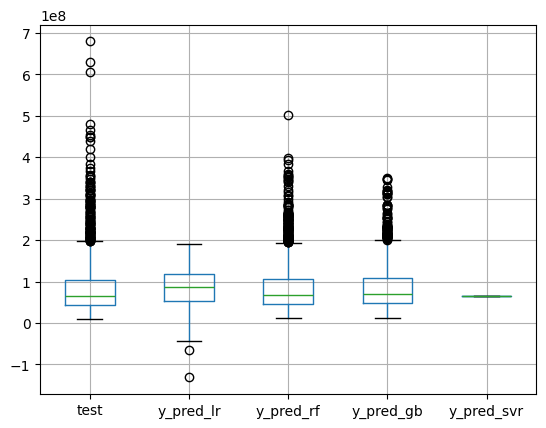

In [35]:
y_exploracion_df.boxplot()

In [39]:
y_exploracion_df.hist()

array([[<Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'y_pred_lr'}>],
       [<Axes: title={'center': 'y_pred_rf'}>,
        <Axes: title={'center': 'y_pred_gb'}>],
       [<Axes: title={'center': 'y_pred_svr'}>, <Axes: >]], dtype=object)